In [1]:
# !pip install yfinance
import yfinance as yf

In [2]:
import pandas as pd
import numpy as np
# import seaborn as sns
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [3]:
start = datetime.datetime(2008,8,8)
end = datetime.datetime(2014,7,1)
test_start = datetime.datetime(2014,7,2)
test_end = datetime.datetime(2016,7,1)

In [4]:
# Amazon
Amazon_train = yf.download("AMZN", start, end)
Amazon_test = yf.download("AMZN", test_start, test_end)

# Meta
Meta = yf.download("META", start, end)

# Alphabet
Alphabet = yf.download("GOOG", start, end)

# Microsoft
Microsoft = yf.download("MSFT", start, end)

# Apple
Apple = yf.download("AAPL", start, end)

# IBM
IBM = yf.download("IBM", start, end)

# Meta
NVIDIA = yf.download("NVDA", start, end)

# Alphabet
Tesla = yf.download("TSLA", start, end)

# Salesforce
Salesforce = yf.download("CRM", start, end)

# AMD
AMD = yf.download("AMD", start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
Amazon_train.reset_index(inplace=True)
Amazon_test.reset_index(inplace=True)

Meta.reset_index(inplace=True)
Alphabet.reset_index(inplace=True)
Microsoft.reset_index(inplace=True)
Apple.reset_index(inplace=True)
IBM.reset_index(inplace=True)
NVIDIA.reset_index(inplace=True)
Tesla.reset_index(inplace=True)
Salesforce.reset_index(inplace=True)
AMD.reset_index(inplace=True)

In [6]:
Amazon_train["Company"]='Amazon'
Amazon_test["Company"]='Amazon'

Meta["Company"]='Meta'
Microsoft["Company"]='Microsoft'
Apple["Company"]='Apple'
Alphabet["Company"]='Alphabet'
IBM["Company"]='IBM'
NVIDIA["Company"]='NVIDIA'
Tesla["Company"]='Tesla'
Salesforce["Company"]='Salesforce'
AMD["Company"]='AMD'

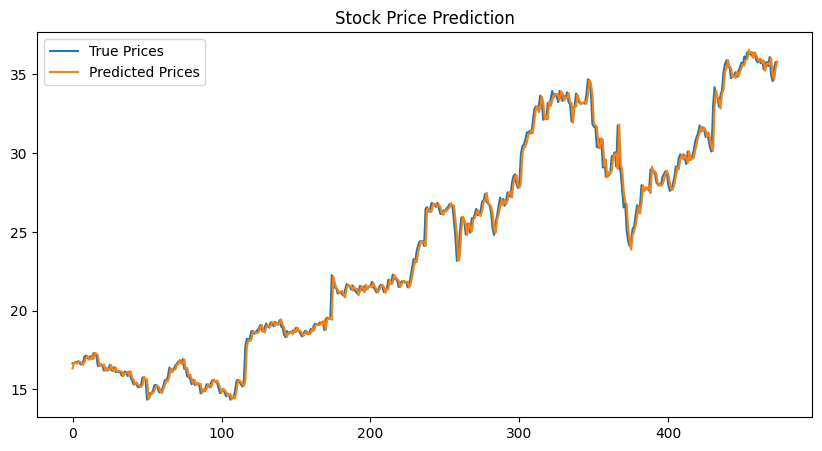

Model R^2 Score: 0.9941350060323146


In [10]:
def prepare_data(data, days=30):
    X, y = [], []
    for i in range(len(data) - days):
        X.append(data['Close'].values[i:i+days])
        y.append(data['Close'].values[i+days])
    return np.array(X), np.array(y)

# Prepare the data
X_train, y_train = prepare_data(Amazon_train)
X_test, y_test = prepare_data(Amazon_test)
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='True Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.title('Stock Price Prediction')
plt.show()

# Print the model performance
print(f"Model R^2 Score: {model.score(X_test, y_test)}")